In [103]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Qn-1 Problem 
A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units.A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level.Please state the assumptions and tests that you carried out to check validity of the assumptions.

In [104]:
#Import the dataset
df=pd.read_csv('Cutlets.csv')
df.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [105]:
# formulate the null hypothesis and alternate hypothesis:
#null hypothesis, Ho=diameter of cutlet of Unit A=diameter of cutlet of Unit B
#Alternate Hypothesis, Ha=diameter of cutlet of Unit A !=diameter of cutlet of Unit B

In [106]:
#Two samples are given and Population std deviation is not given so, its a Two sample two tailed t Test.

In [107]:
UnitA=pd.Series(df.iloc[:,0])
UnitA.head()

0    6.8090
1    6.4376
2    6.9157
3    7.3012
4    7.4488
Name: Unit A, dtype: float64

In [108]:
UnitB=pd.Series(df.iloc[:,1])
UnitB.head()

0    6.7703
1    7.5093
2    6.7300
3    6.7878
4    7.1522
Name: Unit B, dtype: float64

In [109]:
#Calculate P Value:
stats.ttest_ind(UnitA,UnitB)

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

In [110]:
pvalue=0.4722394724599501

In [111]:
if pvalue<=0.05:
    print('Reject the null hypothesis & so diameter of cutlet of Unit A is not equal to diameter of cutlet of Unit B.')
else:
    print('Fail to reject the null hypothesis,& so diameter of cutlet of Unit A is equal to diameter of cutlet of Unit B.')

Fail to reject the null hypothesis,& so diameter of cutlet of Unit A is equal to diameter of cutlet of Unit B.


# Qn-2 Problem 
A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
  Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.


In [112]:
LabTAT=pd.read_csv('labTAT.csv')
LabTAT.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [113]:
#More than two population are given so here we will perform the Annova Test on this 4 independent sample with numerical data.

In [114]:
# Step 1=formulate the null hypothesis and alternate hypothesis:
#null hypothesis, Ho= Avg TAT of report of Lab1= Avg TAT of report of Lab2= Avg TAT of report of Lab3= Avg TAT of report of Lab4
#Alternate Hypothesis, Ha= Atleast one Population sample Average(mean) is different.

In [115]:
#Descriptive Statistics
LabTAT.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [116]:
#Check the Null Value
LabTAT.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

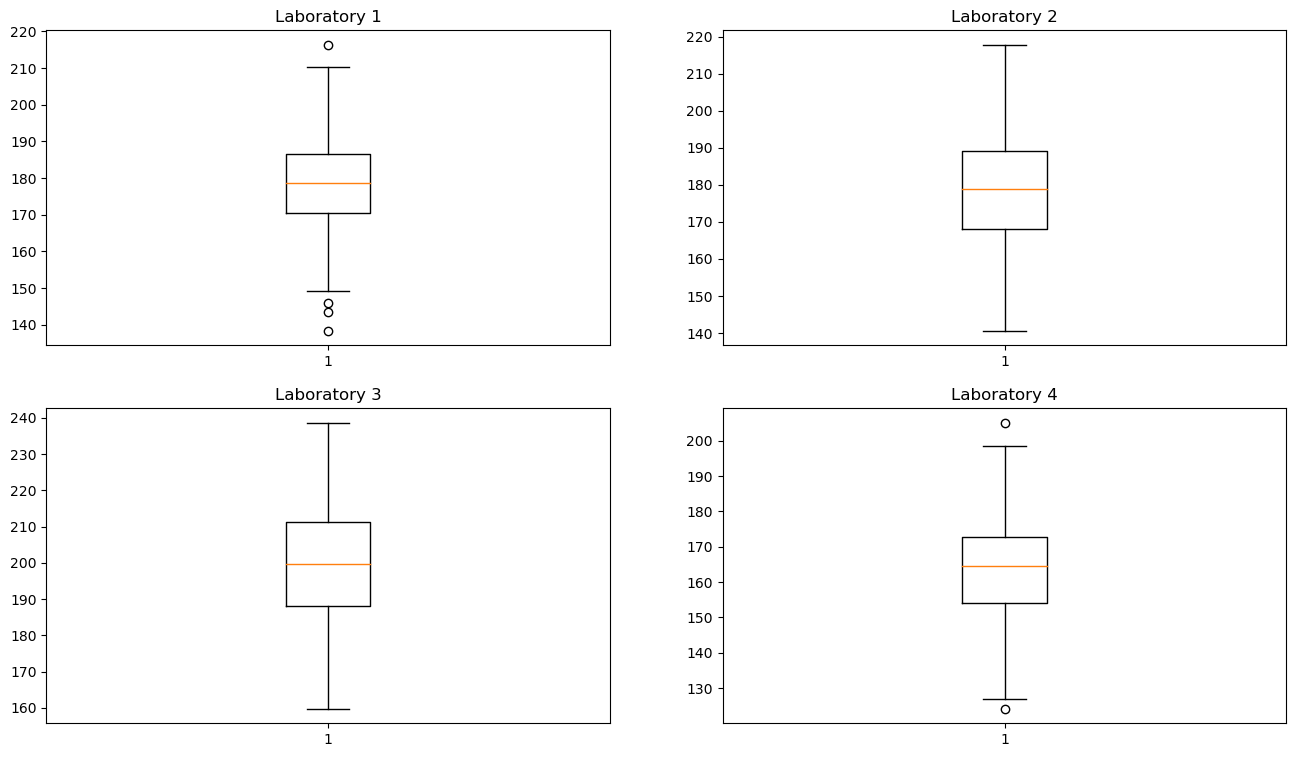

In [117]:
plt.subplots(figsize=(16,9))
plt.subplot(221)
plt.boxplot(LabTAT['Laboratory 1'])
plt.title('Laboratory 1')

plt.subplot(222)
plt.boxplot(LabTAT['Laboratory 2'])
plt.title('Laboratory 2')

plt.subplot(223)
plt.boxplot(LabTAT['Laboratory 3'])
plt.title('Laboratory 3')

plt.subplot(224)
plt.boxplot(LabTAT['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

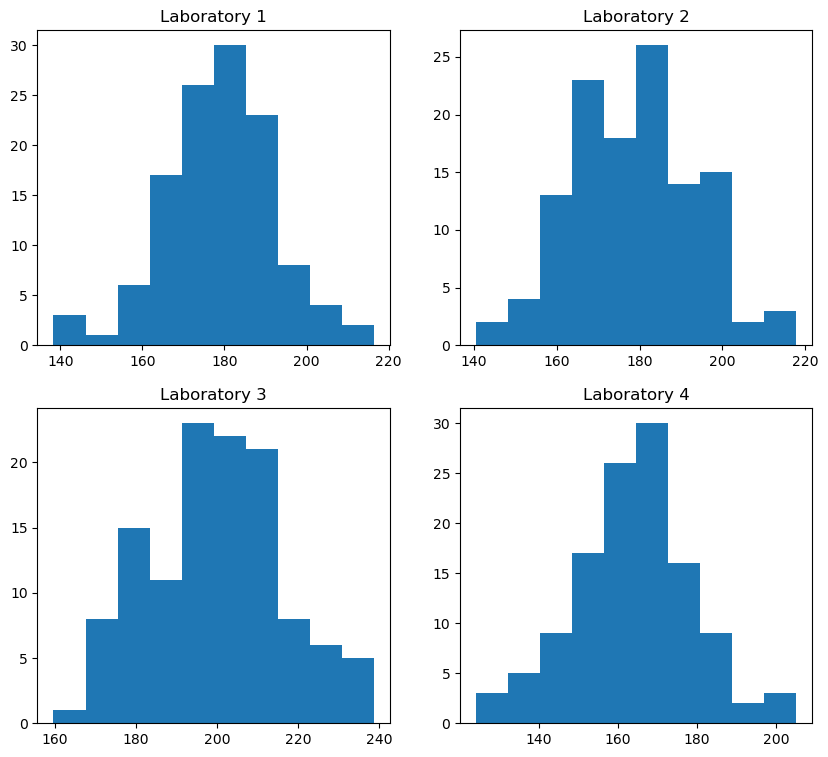

In [118]:
plt.subplots(figsize=(10,9))
plt.subplot(221)
plt.hist(LabTAT['Laboratory 1'])
plt.title('Laboratory 1')

plt.subplot(222)
plt.hist(LabTAT['Laboratory 2'])
plt.title('Laboratory 2')

plt.subplot(223)
plt.hist(LabTAT['Laboratory 3'])
plt.title('Laboratory 3')

plt.subplot(224)
plt.hist(LabTAT['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

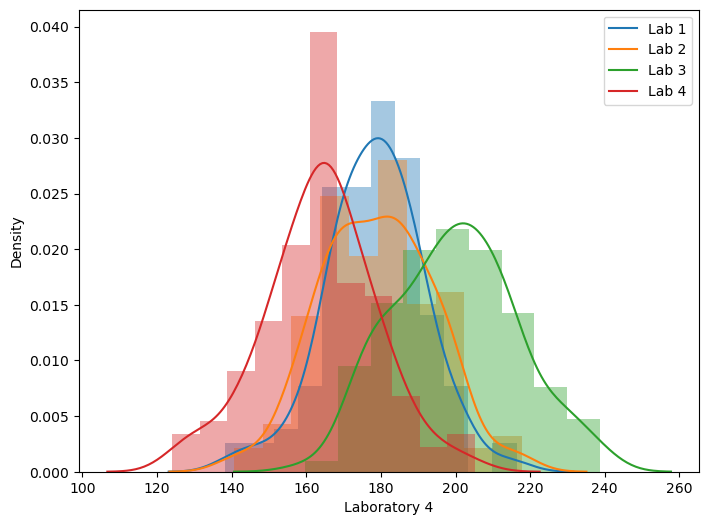

In [119]:
plt.figure(figsize=(8,6), edgecolor='Red')
labels=['Lab 1', 'Lab 2', 'Lab 3', 'Lab 4']
sns.distplot(LabTAT['Laboratory 1'],kde=True)
sns.distplot(LabTAT['Laboratory 2'],kde=True)
sns.distplot(LabTAT['Laboratory 3'],kde=True)
sns.distplot(LabTAT['Laboratory 4'],kde=True)
plt.legend(labels)

In [120]:
#Calculate P Value:
stats.f_oneway(LabTAT['Laboratory 1'],LabTAT['Laboratory 2'],LabTAT['Laboratory 3'],LabTAT['Laboratory 4'])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [121]:
pvalue=2.1156708949992414e-57

In [122]:
if pvalue<=0.05:
    print('Reject the null hypothesis & so Atleast one Population sample Average(mean) is different.(there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list)')
else:
    print('Fail to reject the null hypothesis,& so All population sample average is equal')

Reject the null hypothesis & so Atleast one Population sample Average(mean) is different.(there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list)


## Conclusion:Reject the null hypothesis & so Atleast one Population sample Average(mean) is different.(there is a difference in the average Turn Around Time of reports of the laboratories on their preferred list)

# Qn-3 Probelm 
Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

In [123]:
#Formulate the null and alternative hypothesis:
#Ho= Male-Female buyer rations are similar across the region.i.e. there is no dependency of regions on male female rations.
#Ha= Male-Female buyer rations are not similar across the region.i.e. there is dependency of regions on male female rations.

In [124]:
#import the necessory library
from scipy.stats import chi2_contingency

In [125]:
East=[50,550]
West=[142,351]
North=[131,480]
South=[70,350]

In [126]:
#Create a data frame:
Buyer_Ratio=pd.DataFrame({'East':East,'West':West,'North':North,'South':South},
                      index=['Males','Females'])
Buyer_Ratio

,East,West,North,South
Males,50,142,131,70
Females,550,351,480,350


In [127]:
#Perform the chi square test to calculate the statistic value, Pvalue, degree of freedom and expected values:
stats,p,dof,exp_value=chi2_contingency(Buyer_Ratio)
stats,p,dof,exp_value

(80.27295426602495,
 2.682172557281901e-17,
 3,
 array([[111.01694915,  91.21892655, 113.05225989,  77.71186441],
        [488.98305085, 401.78107345, 497.94774011, 342.28813559]]))

In [128]:
#Print array of Observed Values & Expected Values:
Observed_Values=np.array([50,142,131,70,550,351,480,350])
Expected_Values=np.array([111.02,  91.22, 113.05,  77.71,488.98, 401.78, 497.95, 342.29])
print('Observed_Values=',Observed_Values,"\n",'Expected_Values=',Expected_Values)

Observed_Values= [ 50 142 131  70 550 351 480 350] 
 Expected_Values= [111.02  91.22 113.05  77.71 488.98 401.78 497.95 342.29]


In [129]:
from scipy.stats import chisquare

In [130]:
statistic,pvalue=chisquare(Observed_Values,Expected_Values,ddof=3)
print('statistic=',statistic,"\n",'pvalue=',pvalue)

statistic= 80.27491116117751 
 pvalue= 1.5232176033445667e-16


In [131]:
if pvalue<=0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


##Conclusion: Result is reject the null hypothesis, so Male-Female buyer rations are not similar across the region.i.e. there is dependency of regions on male female rations

# Qn-4 Problem 
TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences

Minitab File: CustomerOrderForm.mtw

In [155]:
#Define the Null hypothesis and alternate hypothesis:
#Ho=The defective %  varies by centre.
#Ha=The defective % do not varies by center.

In [132]:
#import the dataset
center=pd.read_csv('Costomer+OrderForm.csv')
center.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [133]:
#Descriptive statistics:
center.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [134]:
#check the size of data:
center.shape

(300, 4)

In [135]:
#check all data type:
center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [136]:
#check any null value:
center.isna().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [137]:
#Calculate the Defective and error free values:
print(center['Phillippines'].value_counts(),'\n',center['Indonesia'].value_counts(),'\n',center['Malta'].value_counts(),'\n',center['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


In [138]:
#Create a Tabel:
contengency_table=[[271,267,269,280],[29,33,31,20]]
contengency_table

[[271, 267, 269, 280], [29, 33, 31, 20]]

In [146]:
#Calculating Expected Values for Observed data:
stats,p,dof,exp_value=chi2_contingency(contengency_table)
print('stats=',stats,"\n",'p=',p,"\n",'dof=',dof,"\n",'expected_value=',exp_value)

stats= 3.858960685820355 
 p= 0.2771020991233135 
 dof= 3 
 expected_value= [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [149]:
#Defining Expected values and observed values:
observed_value=np.array([271,267,269,280,29,33,31,20])
expected_value=np.array([271.75,271.75,271.75,271.75,28.25,28.25,28.25,28.25])
print('observed_value=',observed_value,"\n",'expected_value=',expected_value)

observed_value= [271 267 269 280  29  33  31  20] 
 expected_value= [271.75 271.75 271.75 271.75  28.25  28.25  28.25  28.25]


In [153]:
#Compare Evidences with Hypothesis using t-statictic:
statistic,pvalue=chisquare(observed_value, expected_value,ddof=3)
print('statistic=',statistic,"\n",'pvalue=',pvalue)

statistic= 3.858960685820355 
 pvalue= 0.4254298144535761


In [154]:
if pvalue<=0.05:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Fail to reject the null hypothesis


# Conclusion: Fail to reject the null hypothesis, So the defective %  varies by centre.